In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
df = pd.read_csv("../knn/sign_mnist_train.csv")
df.drop(df.index[100:], inplace=True)

df.shape

df.to_csv("sign_mnist_experimental.csv")

In [19]:
train, test = train_test_split(df, test_size=0.3)

In [20]:
y_train_arr = np.asarray(train['label'])
y_test_arr = np.asarray(test['label'])

In [21]:
test.drop(columns=['label'], inplace=True)
train.drop(columns=['label'],inplace=True)

In [22]:
medias = train.mean()
medias

pixel1      141.800000
pixel2      145.000000
pixel3      148.942857
pixel4      149.457143
pixel5      153.200000
               ...    
pixel780    160.300000
pixel781    156.714286
pixel782    156.828571
pixel783    156.957143
pixel784    154.957143
Length: 784, dtype: float64

In [23]:
train_centralizado = train - medias
train_centralizado.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
30,-7.8,-9.0,-9.942857,-9.457143,-11.2,-12.842857,-13.414286,-15.842857,-18.185714,-20.457143,...,31.357143,19.742857,17.171429,6.842857,2.342857,13.7,11.285714,0.171429,-7.957143,-13.957143
10,-8.8,-10.0,-7.942857,-3.457143,-3.2,-1.842857,-1.414286,-2.842857,-1.185714,-1.457143,...,-37.642857,-46.257143,-50.828571,-57.157143,-65.657143,-65.3,-62.714286,-62.828571,-63.957143,-62.957143
13,-61.8,-47.0,-27.942857,-110.457143,-100.2,-62.842857,-59.414286,-54.842857,-54.185714,-38.457143,...,97.357143,86.742857,87.171429,80.842857,76.342857,80.7,85.285714,87.171429,89.042857,91.042857
34,35.2,35.0,32.057143,32.542857,29.8,27.157143,24.585714,22.157143,19.814286,15.542857,...,71.357143,64.742857,59.171429,49.842857,41.342857,41.7,42.285714,42.171429,44.042857,47.042857
15,-55.8,-58.0,-59.942857,-56.457143,-49.2,-42.842857,-37.414286,-30.842857,-27.185714,-26.457143,...,115.357143,101.742857,91.171429,89.842857,67.342857,-3.3,-71.714286,-34.828571,-15.957143,-26.957143
33,50.2,48.0,44.057143,44.542857,41.8,39.157143,34.585714,33.157143,30.814286,27.542857,...,-7.642857,-32.257143,-22.828571,-25.157143,-28.657143,-23.3,-25.714286,-20.828571,-16.957143,-9.957143
40,55.2,52.0,48.057143,47.542857,44.8,41.157143,38.585714,36.157143,32.814286,29.542857,...,-78.642857,-77.257143,-91.828571,-102.157143,-86.657143,-111.3,-101.714286,-101.828571,-95.957143,-96.957143
6,-7.8,-11.0,-13.942857,-14.457143,-17.2,-19.842857,-22.414286,-23.842857,-26.185714,-28.457143,...,-27.642857,-40.257143,-55.828571,-89.157143,-23.657143,28.7,22.285714,24.171429,24.042857,24.042857
92,-65.8,-66.0,-65.942857,-63.457143,-59.2,-48.842857,-39.414286,-32.842857,-31.185714,-29.457143,...,-52.642857,-95.257143,-10.828571,59.842857,47.342857,48.7,50.285714,49.171429,48.042857,48.042857
56,-4.8,-3.0,-2.942857,1.542857,0.8,0.157143,-0.414286,-0.842857,-1.185714,-2.457143,...,70.357143,62.742857,56.171429,47.842857,39.342857,38.7,42.285714,40.171429,39.042857,40.042857


In [24]:
test_centralizado  = test - medias
test.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
94,136,141,145,148,152,155,158,159,163,165,...,123,105,89,199,251,241,243,243,243,243
62,82,88,96,110,121,119,122,130,135,139,...,186,181,176,162,150,142,135,125,112,93
78,190,191,191,191,191,192,192,191,192,192,...,92,164,205,198,201,202,203,202,203,204
31,148,151,157,164,170,173,175,179,182,186,...,184,213,195,226,225,197,179,113,130,124
65,169,175,179,183,186,188,192,193,195,197,...,226,225,225,225,224,223,221,220,218,217
53,180,183,188,195,199,202,207,210,211,213,...,145,255,248,247,247,246,245,244,241,239
28,72,80,87,92,96,101,105,109,112,116,...,94,69,91,166,159,159,158,157,156,154
46,197,195,196,195,197,196,195,196,196,196,...,84,65,182,213,211,212,212,213,213,213
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
51,110,112,116,117,118,121,123,124,125,128,...,158,158,157,156,156,155,155,154,154,154


In [25]:
train_centralizado_arr = np.asarray(train_centralizado)
# full_matrices = false porque é a decomposição svd reduzida    
U, S, Vt = np.linalg.svd(train_centralizado_arr, full_matrices=False)

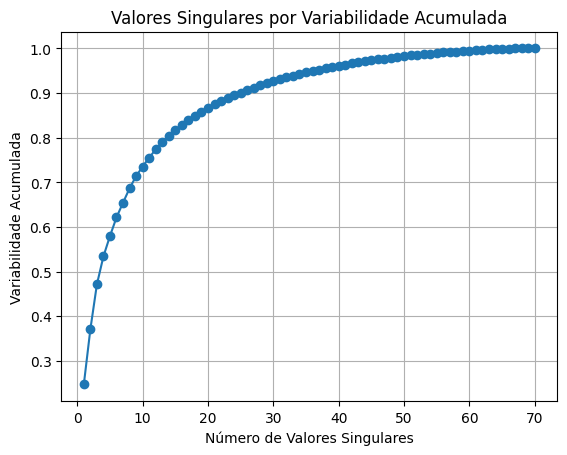

In [26]:
variability = np.cumsum(S**2) / np.sum(S**2)

# Gráfico
plt.plot(range(1, len(variability) + 1), variability, marker='o')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Variabilidade Acumulada')
plt.title('Valores Singulares por Variabilidade Acumulada')
plt.grid(True)
plt.show()

In [27]:
variability_target = 0.90

# Encontrar o número de valores singulares que atingem a variabilidade desejada
r = np.where(variability >= variability_target)[0][0] + 1
print(f'Número de valores singulares para atingir {variability_target*100}% de variabilidade: {r}')

Número de valores singulares para atingir 90.0% de variabilidade: 25


In [28]:
test_centralizado_arr = np.asarray(test_centralizado)
print(test_centralizado_arr)

[[ -5.8         -4.          -3.94285714 ...  86.17142857  86.04285714
   88.04285714]
 [-59.8        -57.         -52.94285714 ... -31.82857143 -44.95714286
  -61.95714286]
 [ 48.2         46.          42.05714286 ...  45.17142857  46.04285714
   49.04285714]
 ...
 [ 27.2         27.          25.05714286 ...  82.17142857  81.04285714
   83.04285714]
 [ 46.2         47.          43.05714286 ...  78.17142857  78.04285714
   80.04285714]
 [-23.8        -25.         -20.94285714 ...   9.17142857  13.04285714
   25.04285714]]


In [29]:

Vt_reduced = Vt[:r, :]

# Calcular as matrizes de componentes principais
P_train = np.dot(train_centralizado_arr, Vt_reduced.T)
P_test = np.dot(test_centralizado_arr, Vt_reduced.T)

In [30]:
print("Matriz de componentes principais P_train:\n", P_train)
print("Matriz de componentes principais P_test:\n", P_test)

Matriz de componentes principais P_train:
 [[-1.03865576e+02  2.41271913e+02 -1.81396433e+02 ...  1.53432339e+00
   6.44674348e+01 -2.29748547e+01]
 [ 1.17025551e+02  6.70420358e+02 -2.61044222e+02 ... -5.58815034e+01
  -2.30366839e+02 -2.10355692e+02]
 [-1.64690884e+02 -1.41068723e+02 -1.12893732e+03 ...  2.52320957e+01
  -9.84752765e+01 -3.19230928e+02]
 ...
 [-7.28061685e+02 -4.00360961e+02 -2.14251494e+01 ...  2.59719817e+01
  -6.18864146e+00  4.79590793e+01]
 [ 6.02534990e+02  8.61933129e+02  4.47042969e+02 ...  2.43512581e+02
   4.20027182e+01  1.10920829e+02]
 [-1.32910111e+03 -1.36456419e+01 -7.10710537e+02 ...  6.80709847e+01
   6.82845333e-01 -1.71055002e+02]]
Matriz de componentes principais P_test:
 [[ 8.67380972e+02  4.27293067e+02 -6.18991380e+02  3.33718654e+01
  -1.71312933e+02  1.50639661e+02 -1.29870799e+02 -1.74172799e+01
  -5.30056488e+01 -1.12377565e+02 -1.38899326e+02 -1.31033300e+02
   1.67293952e+02  1.09385674e+02  1.24836652e+02 -1.75670551e+02
   5.07760680e+

In [33]:
def calculo_rmse(result, y_test):
    diff = (np.array(result) - np.array(y_test)) ** 2

    mean_diff = np.mean(diff)

    rmse = np.sqrt(mean_diff)

    return rmse

def euclidian_distance(x, y):
    len_x = len(x)
    len_y = len(y)
    if (len_x < len_y):
        x.resize(len_y, refcheck=False)
        x[len_x:(len_y-1)] = 0
    elif (len_y < len_x):
        y.resize(len_x, refcheck=False)
        y[len_y:(len_x-1)] = 0
    if (len(x) == len(y)):
        diff = 0
        for index, value_x in enumerate(x):
            diff+=(value_x-y[index])*(value_x-y[index])
        return np.sqrt(diff)
    else:
        print("Não foi possível calcular a distância euclidiana")
        return


def mahalanobis_distance(x, y, S):
    diff = x - y

    dist = np.sqrt(np.dot(np.dot(diff.T, S), diff))
    
    return dist


def knn (x_train, x_test, y_train, S, type):
    classes_prediction = []
    for test_vector in x_test:
        distances_classes = []
        for index, train_vector in enumerate(x_train):
            if (type == "mahalanobis"):
                dist = mahalanobis_distance(train_vector, test_vector, S)
            elif (type == "euclidiana"):
                # essa distância euclidiana foi comparada com a do scipy
                dist = euclidian_distance(train_vector, test_vector)
            else:
                raise TypeError("O argumento deve ser uma string de valor 'mahalanobis' ou 'euclidiana'")
            distances_classes.append((dist, y_train[index]))
        distances_classes.sort()
        classes_prediction.append(distances_classes[0][1])
    print(classes_prediction)
    return classes_prediction

# Funcao para calcular a matriz S necessaria para o cálculo da distancia de mahalanobis
def calculo_matriz_S (train, test):

    # A matriz S é calculada a partir do banco de dados todo
    dataset = np.concatenate((train, test), axis=0)
    cov_X = np.cov(dataset, rowvar=False)
    rank = np.linalg.matrix_rank(cov_X)
    
    # todas os vetores de imagens possuem 784 colunas, se o posto não for máximo não é possível inverter a matriz
    if (rank != 784):
        raise ValueError("Não é possível calcular a inversa desta matriz")

    else:
        print("Foi possível calcular a matriz S")
        inv_X = np.linalg.inv(cov_X)
        return inv_X
    
def knn_euclidian(X_train, X_test, y_train, y_test):
    start_time = time.time()
    result = knn(X_train, X_test, y_train, S = 0, type="euclidiana")
    end_time = time.time()
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    rmse = calculo_rmse(result, y_test)
    print(f"O valor do RMSE é: {rmse}.")
    return result, rmse



In [35]:
result = knn_euclidian(P_train, P_test, y_train_arr, y_test_arr)

[10, 15, 19, 0, 6, 10, 20, 13, 21, 16, 21, 2, 0, 0, 16, 19, 15, 6, 5, 19, 23, 6, 15, 21, 20, 2, 19, 2, 3, 21]
Tempo de execução: 0.014492 segundos
O valor do RMSE é: 10.276186062932103.
